In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df_train = pd.read_csv('E:\\Datasets\\nslTrain_data.csv')
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
X = df_train.drop(columns=["xAttack"])
y = df_train["xAttack"]

In [4]:
df_test = pd.read_csv('E:\\Datasets\\nslTest_data.csv')
df_test.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,202,0,icmp,25,4,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,768,0,icmp,25,2,312,1856,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,3753,0,icmp,25,2,245,2058,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,20087,0,icmp,25,2,298,1267,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,16159,0,icmp,20,2,740,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
df_test = df_test.drop(df_test.columns[[0]],axis = 1)
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: xAttack, dtype: int64

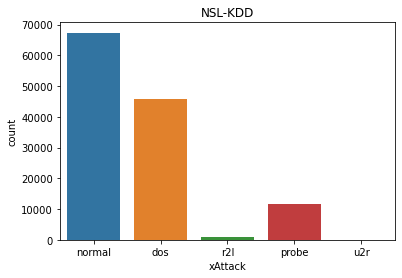

In [6]:
sns.countplot(x = "xAttack", data = df_train).set(title='NSL-KDD')
df_train["xAttack"].value_counts()

In [7]:
df_train["xAttack"].value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: xAttack, dtype: int64

In [8]:
total = df_train.shape[0]
missing_columns = [col for col in df_train.columns if df_train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [9]:
print(f"Number of duplicate rows: {df_train.duplicated().sum()}")

Number of duplicate rows: 32


In [10]:
df_train.drop_duplicates(keep=False, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(df_train)
le(df_test)

In [13]:
X_train = df_train.drop(['xAttack'], axis=1)
Y_train = df_train['xAttack']

In [14]:
X_train.shape

(125910, 41)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [16]:
timesteps = 1
input_dim = 41
# Define an RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(timesteps, input_dim), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
import numpy as np

import pandas as pd

# Assuming X_train is your DataFrame
# Convert it to a NumPy arra

X_train = X_train.to_numpy()
# Reshape X_train to have 3D shape (batch_size, timesteps, input_dim)
X_train = X_train.reshape(-1, timesteps, input_dim)


# Assuming X_train is your training data
# Reshape X_train to have 3D shape (batch_size, timesteps, input_dim)



# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with your data
model.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
3935/3935 [==============================] - 14s 3ms/step - loss: -66331.8516 - accuracy: 0.8062
Epoch 2/10
3935/3935 [==============================] - 11s 3ms/step - loss: -241037.0469 - accuracy: 0.8186
Epoch 3/10
3935/3935 [==============================] - 11s 3ms/step - loss: -449452.3750 - accuracy: 0.8215
Epoch 4/10
3935/3935 [==============================] - 11s 3ms/step - loss: -692402.1875 - accuracy: 0.8233
Epoch 5/10
3935/3935 [==============================] - 11s 3ms/step - loss: -1099277.7500 - accuracy: 0.8247
Epoch 6/10
3935/3935 [==============================] - 11s 3ms/step - loss: -1515551.0000 - accuracy: 0.8267
Epoch 7/10
3935/3935 [==============================] - 11s 3ms/step - loss: -2005739.0000 - accuracy: 0.8272
Epoch 8/10
3935/3935 [==============================] - 11s 3ms/step - loss: -2511207.0000 - accuracy: 0.8281
Epoch 9/10
3935/3935 [==============================] - 11s 3ms/step - loss: -3112953.0000 - accuracy: 0.8280
Epoch 10/10
393

In [17]:
 from tensorflow.keras.models import Model

# Create a feature extraction model
feature_extraction_model = Model(inputs=model.input, outputs=model.layers[0].output)

# Extract features from your data
learned_features = feature_extraction_model.predict(X_train)


3935/3935 [==============================] - 8s 2ms/step


In [18]:
# Define a classifier or regressor (e.g., a dense neural network)
classifier = Sequential()
classifier.add(Dense(64, activation='relu', input_shape=(learned_features.shape[1],)))
classifier.add(Dense(1, activation='sigmoid'))  # For binary classification, adjust for your task

# Compile and train the classifier
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(learned_features, Y_train, epochs=10, batch_size=32)


Epoch 1/10
3935/3935 [==============================] - 11s 2ms/step - loss: -5357630.5000 - accuracy: 0.8293
Epoch 2/10
3935/3935 [==============================] - 10s 2ms/step - loss: -14969814.0000 - accuracy: 0.8398
Epoch 3/10
3935/3935 [==============================] - 10s 2ms/step - loss: -27954072.0000 - accuracy: 0.8428
Epoch 4/10
3935/3935 [==============================] - 10s 2ms/step - loss: -44805812.0000 - accuracy: 0.8441
Epoch 5/10
3935/3935 [==============================] - 10s 2ms/step - loss: -63326088.0000 - accuracy: 0.8455
Epoch 6/10
3935/3935 [==============================] - 10s 2ms/step - loss: -84342632.0000 - accuracy: 0.8459
Epoch 7/10
3935/3935 [==============================] - 10s 2ms/step - loss: -110411816.0000 - accuracy: 0.8466
Epoch 8/10
3935/3935 [==============================] - 10s 2ms/step - loss: -143152736.0000 - accuracy: 0.8464
Epoch 9/10
3935/3935 [==============================] - 10s 3ms/step - loss: -175352688.0000 - accuracy: 0.8467

In [19]:
# List the names of the layers in your model
for layer in model.layers:
    print(layer.name)


simple_rnn
dense


In [20]:
from tensorflow.keras.models import Model

# Choose the layer for feature extraction
feature_extraction_layer = model.get_layer('dense')  # Replace with the actual layer name

# Create a feature extraction model
feature_extraction_model = Model(inputs=model.input, outputs=feature_extraction_layer.output)


In [21]:
# Extract features from your data
extracted_features = feature_extraction_model.predict(X_train)


3935/3935 [==============================] - 8s 2ms/step


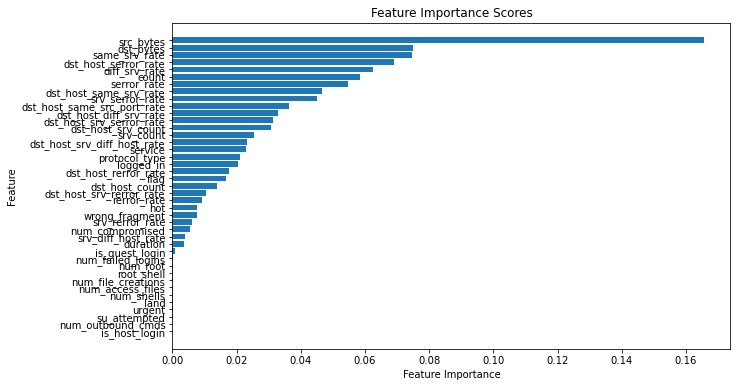

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your tabular data (replace 'your_data.csv' with your dataset)
#data = pd.read_csv('your_data.csv')

# Separate the target variable (e.g., 'target_column_name')
#X = data.drop(columns=['target_column_name'])
#y = data['target_column_name']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import numpy as np

# Assuming X_train is your NumPy array
# Reshape X_train to have 3D shape (batch_size, timesteps, input_dim)
X_train = X_train.reshape(-1, timesteps, input_dim)



X_train = X_train.reshape(-1, X_train.shape[-1])


# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, Y_train)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


In [64]:
selected_features=['src_bytes', 'dst_bytes','same_srv_rate','dst_host_serror_rate','diff_srv_rate', 'count',
                    'srv_count','serror_rate','dst_host_same_srv_rate','same_srv_rate', 'dst_host_same_srv_rate',
                    'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_diff_srv_rate', 'dst_host_srv_serror_rate']

1    67343
0    45891
2    11629
3      995
4       52
Name: xAttack, dtype: int64

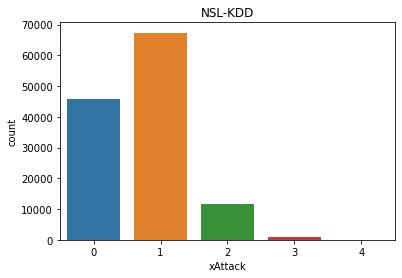

In [66]:
sns.countplot(x = "xAttack", data = df_train).set(title='NSL-KDD')
df_train["xAttack"].value_counts()